<a href="https://colab.research.google.com/github/Aras1703/Neural-Prophet_Forecasting_weather_temperature/blob/main/Time_Series_Forecasting_Weather_Forecasting_(Max_Temperature)_using_Neural_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neuralprophet

     |████████████████████████████████| 56 kB 2.6 MB/s 
     |████████████████████████████████| 748.8 MB 18 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu102 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.


In [ ]:
# MENGIMPOR LIBRARY YANG DIBUTUHKAN

import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# MEMBACA DATA DENGAN PANDAS
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# MELIHAT LIST DARI FEATURE "LOCATION"

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
# MENGECEK TIPE DATA DARI SETIAP FEATURE

df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
# MEMILIH SYDNEY SEBAGAI LOCATION
# MENGUBAH FORMAT TANGGAL MENGGUNAKAN PANDAS

syd = df[df['Location']=='Sydney']
syd['Date'] = pd.to_datetime(syd["Date"])
syd.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [ ]:
# MENGECEK TIPE DATA DARI SETIAP FEATURE PADA DATA BARU BERNAMA "SYD"

syd.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [ ]:
# MENGECEK NILAI NULL DI SETIAP FEATURE DATASET

syd.isnull().sum()

Date                0
Location            0
MinTemp             4
MaxTemp             2
Rainfall            7
Evaporation        51
Sunshine           16
WindGustDir      1038
WindGustSpeed    1038
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        15
Humidity3pm        13
Pressure9am        21
Pressure3pm        19
Cloud9am          568
Cloud3pm          563
Temp9am             5
Temp3pm             4
RainToday           7
RainTomorrow        7
dtype: int64

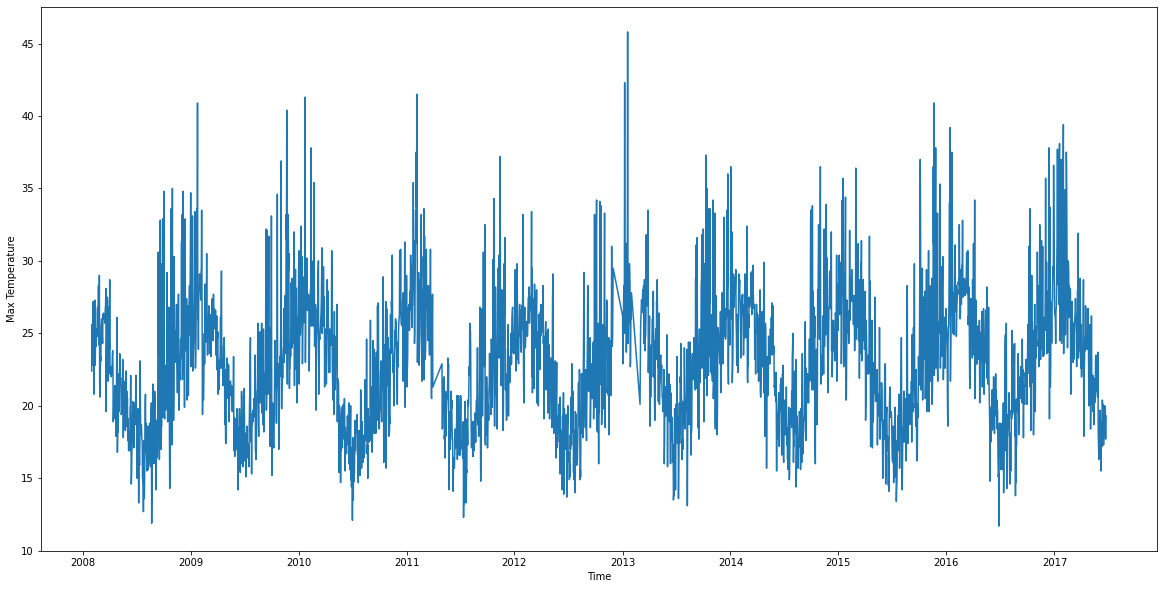

In [ ]:
# VISUALISASI DATA BERUPA FEATURE "TIME" DAN "MAX TEMPERATURE"

plt.figure(figsize=(20, 10))
plt.plot(syd['Date'], syd['MaxTemp'])
plt.xlabel('Time')
plt.ylabel('Max Temperature')
plt.show()

In [ ]:
# MEMILIH FEATURE YANG INGIN DI PREDIKSI (MAX TEMPERATURE)
# MEMBUANG NILAI NAN YANG ADA PADA KOLOM MAX TEMPERATURE 
# MEMBUAT TANGGAL DAN LABEL SEBAGAI "ds" DAN "y"

data = syd[['Date', 'MaxTemp']]
data.dropna(inplace=True)
data.columns = ['ds', 'y']
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
30176,2008-02-01,22.4
30177,2008-02-02,25.6
30178,2008-02-03,24.5
30179,2008-02-04,22.8
30180,2008-02-05,25.7
...,...,...
33515,2017-06-21,19.6
33516,2017-06-22,19.2
33517,2017-06-23,17.7
33518,2017-06-24,19.3


In [ ]:
# MELATIH MODEL, SETTING FREKUENSI DALAM "DAY" DAN ITERASI UNTUK MELATIH DATA = 1000

m = NeuralProphet(growth='logistic', n_changepoints=2, changepoints_range=0.9, yearly_seasonality=2, seasonality_mode='multiplicative')
m.fit(data, freq='D', epochs=1000)

ERROR: nprophet.config - __post_init__: Invalid trend growth 'logistic'. Set to 'linear'
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 3.51E-01
Epoch[1000/1000]: 100%|██████████| 1000/1000 [03:04<00:00,  5.43it/s, SmoothL1Loss=0.0112, MAE=2.28, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
0,0.751713,23.583882,0.0
1,0.060265,5.669701,0.0
2,0.024366,3.426713,0.0
3,0.016450,2.826351,0.0
4,0.014735,2.675058,0.0
...,...,...,...
995,0.011209,2.278708,0.0
996,0.011209,2.279110,0.0
997,0.011208,2.278986,0.0
998,0.011207,2.278833,0.0


In [ ]:
# MEMBUAT PREDIKSI 1 TAHUN KEDEPAN 

future = m.make_future_dataframe(data, periods=730, n_historic_predictions=3340)
forecast = m.predict(future)
forecast

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2008-02-03,24.5,26.120495,1.620495,22.272346,0.305593,-0.001629
1,2008-02-04,22.8,26.101627,3.301627,22.272747,0.305891,-0.003458
2,2008-02-05,25.7,26.110516,0.410516,22.273149,0.306102,-0.003008
3,2008-02-06,27.2,26.037762,-1.162238,22.273552,0.306225,-0.008918
4,2008-02-07,26.3,26.268829,-0.031171,22.273952,0.306257,0.009258
...,...,...,...,...,...,...,...
4065,2019-06-21,NaN,19.012465,NaN,24.102964,-0.357069,0.005769
4066,2019-06-22,NaN,18.921558,NaN,24.103361,-0.359577,0.001986
4067,2019-06-23,NaN,18.835411,NaN,24.103756,-0.361925,-0.001629
4068,2019-06-24,NaN,18.777473,NaN,24.104153,-0.364111,-0.003458


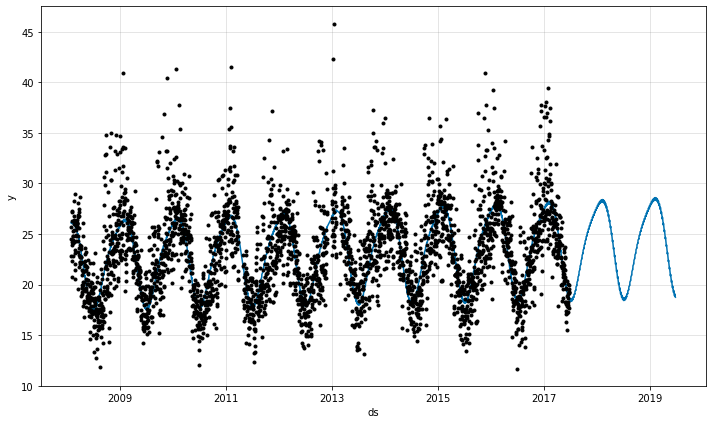

In [ ]:
# VISUALISASI PREDIKSI DATA 
# TAHUN 2018 DAN 2019 MERUPAKAN PREDIKSI 2 TAHUN YANG AKAN DATANG
# DOT HITAM MEREPRESENTASIKAN HASIL PREDIKSI DI TAHUN SEBELUMNYA(SEBAGAI PEMBANDING DENGAN DATA AKTUAL)

m.plot(forecast)
plt.show()

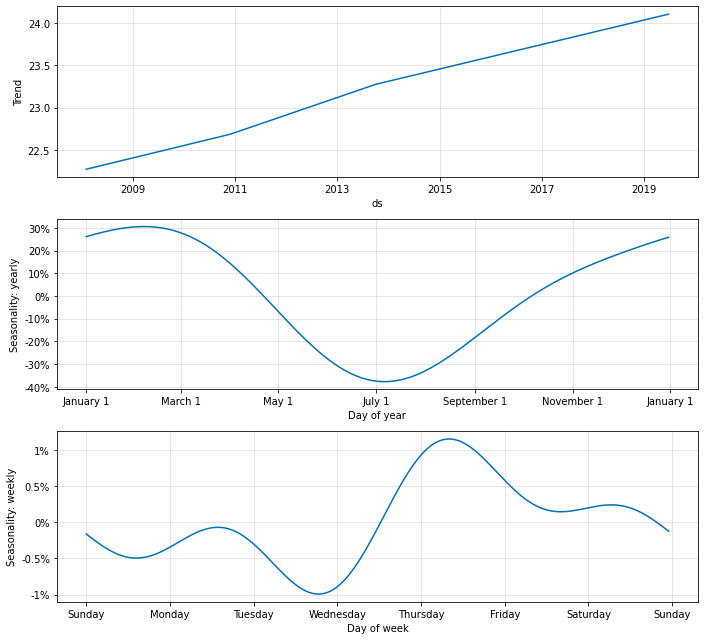

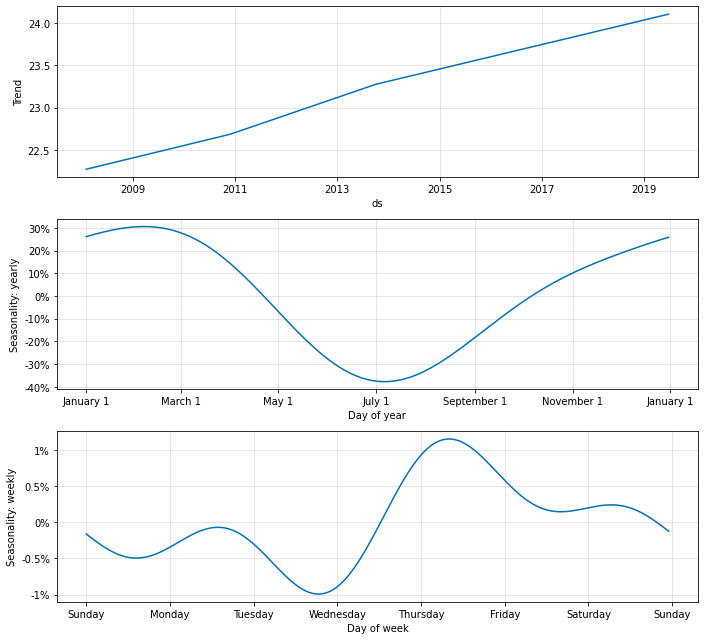

In [ ]:
m.plot_components(forecast)